<a href="https://colab.research.google.com/github/SLuis25/Simulaci-n-I/blob/main/Monte%20Carlo%20de%20Acierto%20y%20Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Media de p tras 10000 iteraciones: 0.6298233999999979


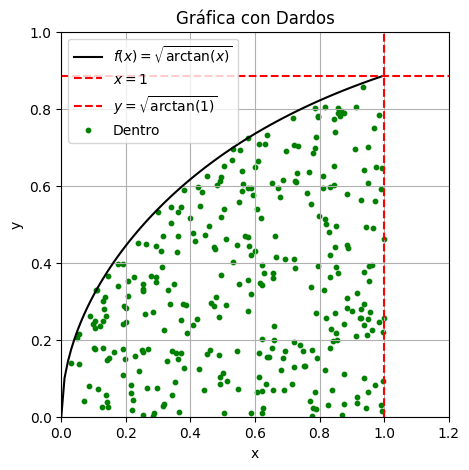

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt

def dardo(n):
    puntos_x_dentro = [] # Almacenamos los puntos x dentro de la región
    puntos_y_dentro = [] # Almacemanos los puntos y dentro de la región

    m = 0  # Contador de puntos dentro de la región bajo la curva
    for i in range(n):
        x1 = random.random()
        y2 = random.random()

        if y2 <= np.sqrt(np.arctan(x1)): # Verificamos si el punto (x1, y2) cae dentro de la región bajo la curva
            puntos_x_dentro.append(x1)
            puntos_y_dentro.append(y2)
            m += 1

    p = m / n  # Proporción de puntos dentro de la región
    return p, puntos_x_dentro, puntos_y_dentro

def media_dardo(n, k):
    valores_p = [dardo(n)[0] for i in range(k)] # Realizamos k simulaciones y almacenamos las proporciones obtenidas
    return sum(valores_p) / k # Devuelve la media de las proporciones obtenidas

# Parámetros
n_puntos = 500
k_iteraciones = 10000

# Calcular la media de p
media_p = media_dardo(n_puntos, k_iteraciones) # Calculamos la media de p utilizando la función media_dardo
print(f"Media de p tras {k_iteraciones} iteraciones: {media_p}")

# Generar puntos con la función dardo
p, x_dentro, y_dentro = dardo(n_puntos)

# Crear la gráfica
x = np.linspace(0, 1, 100) # Generamos valores de x entre 0 y 1 para la curva
y = np.sqrt(np.arctan(x)) # Calculamos los valores correspondientes de y para la curva
y_line = np.sqrt(np.arctan(1)) # Valor de y para x=1 (el límite superior)

plt.figure(figsize=(5,5))
plt.plot(x, y, label=r'$f(x) = \sqrt{\arctan(x)}$', color='black') # Dibuja la curva de la función
plt.axvline(x=1, color='red', linestyle='--', label=r'$x=1$') # Dibuja una línea vertical en x=1
plt.axhline(y=y_line, color='red', linestyle='--', label=rf'$y=\sqrt{{\arctan(1)}}$') # Dibuja una línea horizontal en y= sqrt(arctan(1))

# Agregar los puntos generados y los ponemos de color verde
plt.scatter(x_dentro, y_dentro, color='green', s=10, label="Dentro")

# Configurar límites y etiquetas
plt.xlim(0, 1.2)
plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica con Dardos')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()